# Proyecto 01 
### Curso       : Machine Learning
### Profesor    : Cristian López
### Grupo Número: 3
----
Participantes:
 - Integrante 1: Fabricio Chavez (100%) 
 - Integrante 2: Edgar Chambilla (100%)
 - Integrante 3: Sanders Chancan (100%)

# LOADING LIBRARIES

In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os
from ydata_profiling import ProfileReport
from IPython.display import IFrame , HTML

In [5]:
data_name = "train.csv"
df = pd.read_csv(data_name)
df = df.iloc[:, :36]

# DATA LOADING

In [6]:
df['ACT_OBRA_ACCINV'] = df['ACT_OBRA_ACCINV'].astype(str)

In [7]:
"""
# Descomentar solo si se quiere obtener el documento html del data profiling (Adjuntado a los archivos enviados)
profile = ProfileReport(df, title="Presupuesto y Ejecucion de Gastos 2023" ,correlations={"auto": {"calculate": False}} )


profile.to_file("new_report.html")

with open(os.path.join(os.getcwd(), "new_report.html"), "r", encoding="utf-8") as file:
  html_content = file.read()


HTML(html_content)
"""

'\n# Descomentar solo si se quiere obtener el documento html del data profiling (Adjuntado a los archivos enviados)\nprofile = ProfileReport(df, title="Presupuesto y Ejecucion de Gastos 2023" ,correlations={"auto": {"calculate": False}} )\n\n\nprofile.to_file("new_report.html")\n\nwith open(os.path.join(os.getcwd(), "new_report.html"), "r", encoding="utf-8") as file:\n  html_content = file.read()\n\n\nHTML(html_content)\n'

## ANALYSIS OF DATA PROFILING 

Hemos notado que algunas variables tienen un solo valor que no cambia, por lo que no deben ser utilizadas en el análisis, ya que no contribuyen a explicar ninguna variación.

Las siguientes variables serán objeto de pruebas y análisis, ya que presentan un gran desequilibrio de datos; en todos los casos, más del noventa por ciento de los valores se repiten:

- TIPO_ACT_OBRA_ACCINV
- PRODUCTO_PROYECTO
- TIPO_ACT_OBRA_ACCINV (sí, esta variable está repetida en tu lista)

Estas variables se utilizarán en pruebas preliminares, pero tienen una alta probabilidad de ser descartadas para mejorar la calidad de los modelos.

En cuanto a las variables:

- ACT_OBRA_ACCINV tiene un desequilibrio considerable (58,4% de desequilibrio)
- GRUPO_FN tiene un desequilibrio considerable (53,4%)
- FINALIDAD tiene un desequilibrio considerable (63,8%)
- DISTRITO tiene un desequilibrio considerable (67,2%)
- CATEGORIA_GASTO tiene un desequilibrio considerable (83,4%)
- GENERICA tiene un desequilibrio considerable (86,6%)
- SUBGENERICA tiene un desequilibrio considerable (60,2%)

Aunque el desequilibrio en estas variables es inferior al noventa por ciento, se eliminarán en función de las pruebas realizadas y están sujetas a ser descartadas. Otras variables no mencionadas se eliminarán según los resultados obtenidos en las pruebas estadísticas.

Así, sin las variables que no presentan cambios, se obtienen los siguientes resultados:

In [8]:
columns_to_drop = [
    'FECHA_CORTE', 'ANIO_EJEC', 'SECTOR', 'PLIEGO', 'UNIDAD_EJECUTORA', 
    'SEC_EJEC', 'FUNCION', 'CANT_META_ANUAL', 'AVAN_FISICO_ANUAL', 
    'FUENTE_FINANC', 'RUBRO', 'TIPO_TRANSACCION'
]

for variable in columns_to_drop:
    df = df.drop(columns=variable, axis=1)
    print(variable + "\t\telimination succed ...")


FECHA_CORTE		elimination succed ...
ANIO_EJEC		elimination succed ...
SECTOR		elimination succed ...
PLIEGO		elimination succed ...
UNIDAD_EJECUTORA		elimination succed ...
SEC_EJEC		elimination succed ...
FUNCION		elimination succed ...
CANT_META_ANUAL		elimination succed ...
AVAN_FISICO_ANUAL		elimination succed ...
FUENTE_FINANC		elimination succed ...
RUBRO		elimination succed ...
TIPO_TRANSACCION		elimination succed ...


Finalmente se analizará las siguientes variables

In [9]:
for variable in df.columns:
    print(variable)

print(df)

PROGRAMA_PPTAL
TIPO_PROD_PROY
PRODUCTO_PROYECTO
TIPO_ACT_OBRA_ACCINV
ACT_OBRA_ACCINV
DIVISION_FN
GRUPO_FN
META
FINALIDAD
UNIDAD_MEDIDA
CANT_META_SEM
AVAN_FISICO_SEM
SEC_FUNC
DEPARTAMENTO
PROVINCIA
DISTRITO
UBIGEO
CATEGORIA_GASTO
GENERICA
SUBGENERICA
SUBGENERICA_DET
ESPECIFICA
ESPECIFICA_DET
MTO_PIA
                                         PROGRAMA_PPTAL TIPO_PROD_PROY  \
0                               9001.ACCIONES CENTRALES     3.PRODUCTO   
1                               9001.ACCIONES CENTRALES     3.PRODUCTO   
2     9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...     3.PRODUCTO   
3                               9001.ACCIONES CENTRALES     3.PRODUCTO   
4                               9001.ACCIONES CENTRALES     3.PRODUCTO   
...                                                 ...            ...   
1459  9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...     3.PRODUCTO   
1460  9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESUL...     3.PRODUCTO   
1461  9002.ASIGNACIONES PRESUPUEST

## SEARCHING FOR MISSING DATA

No hay data faltante

In [10]:
missing = df.isna()

print(missing.sum())

PROGRAMA_PPTAL          0
TIPO_PROD_PROY          0
PRODUCTO_PROYECTO       0
TIPO_ACT_OBRA_ACCINV    0
ACT_OBRA_ACCINV         0
DIVISION_FN             0
GRUPO_FN                0
META                    0
FINALIDAD               0
UNIDAD_MEDIDA           0
CANT_META_SEM           0
AVAN_FISICO_SEM         0
SEC_FUNC                0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
UBIGEO                  0
CATEGORIA_GASTO         0
GENERICA                0
SUBGENERICA             0
SUBGENERICA_DET         0
ESPECIFICA              0
ESPECIFICA_DET          0
MTO_PIA                 0
dtype: int64


## SEARCHING FOR DUPLICATES
No existen duplicados 

In [11]:
dups = df.duplicated()
print(dups.sum())

0


## REMOVE DATA TYPE ERRORS
No hay errores de tipo de datos.

In [12]:

dtype_to_type = {
    'int64': np.int64,
    'object': str, 
}
types = df.dtypes

results = []

for column in range(len(types)):
    dtype_of_column = types.iloc[column].name
    expected_type = dtype_to_type[dtype_of_column]
    partial = df.iloc[:, column].apply(lambda x: isinstance(x, expected_type))
    partial_array = partial.to_numpy().reshape(-1, 1)
    results.append(partial_array)
final_results = np.hstack(results)
print(final_results)



[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]]


Aquí se muestran las variables que quedan después de haber efectuado la limpieza de datos:

| Variable         | Descripción                                                             | Tipo   | Naturaleza             |
|------------------|-------------------------------------------------------------------------|--------|------------------------|
| PROGRAMA_PPTAL   | 3 datos donde 2 son los principales y el tercero es                     | String | Cualitativa Nominal   |
| ACT_OBRA_ACCINV  | 10 datos se tiene algo de variabilidad                                  | String | Cualitativa Nominal   |
| DIVISION_FN      | 4 datos donde se tiene variabilidad en las dos primera variables        | String | Cualitativa Ordinal   |
| GRUPO_FN         | 6 datos donde se tiene variabilidad en las dos primera variables        | String | Cualitativa Nominal   |
| META             | mas de 10 valores dispersos                                             | Int    | Cualitativa Nominal   |
| CANT_META_SEM    | +10 valores dispersos                                                   | Int    | Cuantitativa Discreta |
| AVAN_FISICO_SEM  | +10 valores dispersos                                                   | Int    | Cuantitativa Discreta |
| SEC_FUNC         | +10 valores dispersos                                                   | Int    | Cuantitativa Discreta |
| DEPARTAMENTO     | +10 valores dispersos                                                   | String | Cualitativa Nominal   |
| PROVINCIA        | +10 valores dispersos                                                   | String | Cualitativa Nominal   |
| SUBGENERICA      | 7 datos                                                                 | String | Cualitativa Nominal   |
|                  | - Por tipo de servicio                                                   |        |                        |
| TIPO_PROD_PROY   | 2 dato                                                                  | String | Cualitativa Nominal   |


# PREPARE THE DATA FOR REGRESSION

## ENCODING DATA
Se utilizará target encoding para este análisis porque permite capturar información relevante de variables categóricas, lo que puede mejorar el rendimiento del modelo de regresión.

In [13]:
import category_encoders as ce

y_train = df['MTO_PIA'] #MTPIA (Variable Objetivo)
x_train = df.iloc[:,0:23] #Otras varibles
variable_names = x_train.dtypes
x_train['UBIGEO']= x_train['UBIGEO'].astype(str) # se pone como str ya que es un valor categorico
encoder = ce.TargetEncoder(return_df = True)
x_train_encoded = encoder.fit_transform(x_train , y_train)
print(x_train_encoded.dtypes)


PROGRAMA_PPTAL          float64
TIPO_PROD_PROY          float64
PRODUCTO_PROYECTO       float64
TIPO_ACT_OBRA_ACCINV    float64
ACT_OBRA_ACCINV         float64
DIVISION_FN             float64
GRUPO_FN                float64
META                      int64
FINALIDAD               float64
UNIDAD_MEDIDA           float64
CANT_META_SEM             int64
AVAN_FISICO_SEM           int64
SEC_FUNC                  int64
DEPARTAMENTO            float64
PROVINCIA               float64
DISTRITO                float64
UBIGEO                  float64
CATEGORIA_GASTO         float64
GENERICA                float64
SUBGENERICA             float64
SUBGENERICA_DET         float64
ESPECIFICA              float64
ESPECIFICA_DET          float64
dtype: object


Una vez encodeadas las variables procedemos a graficarlas y luego a normalizarlas 

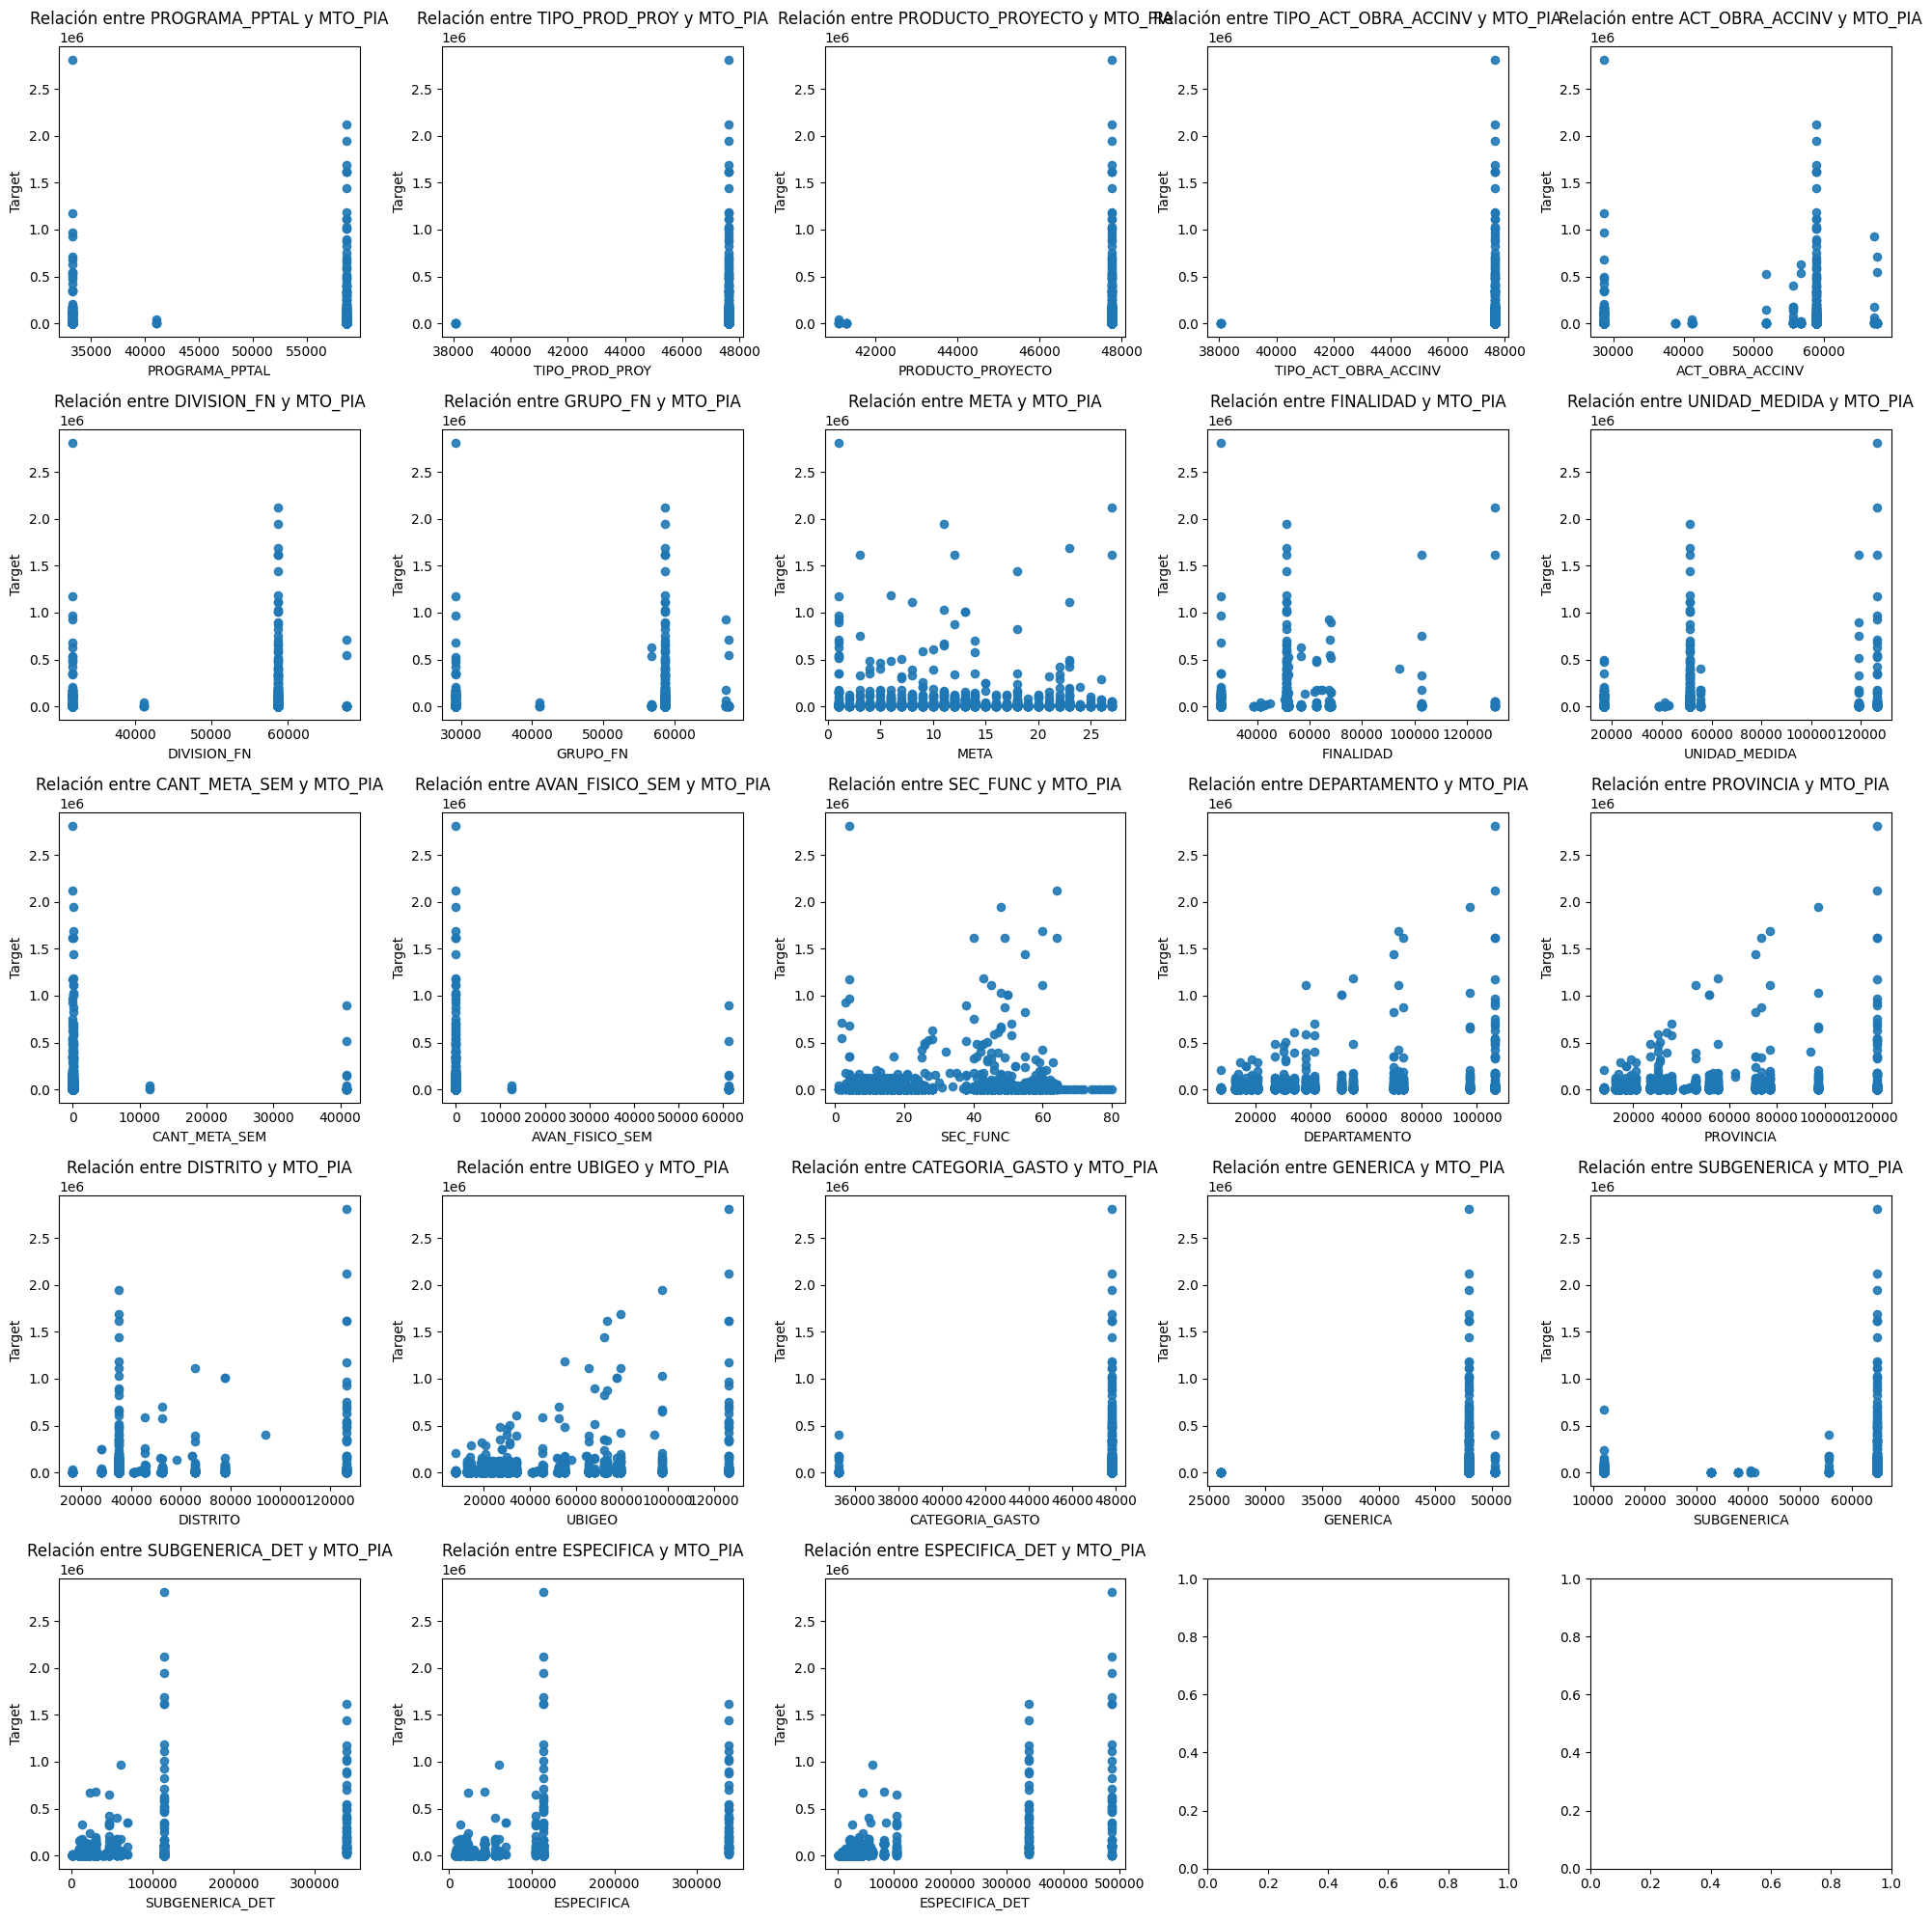

In [14]:
import matplotlib.pyplot as plt
import math

num_columns = x_train_encoded.shape[1] 

# Determinar el número de filas y columnas necesarias
num_graphs_per_row = 5  # cantidad de gráficos por fila
num_rows = math.ceil(num_columns / num_graphs_per_row)  # calcular el número de filas

# Crear subplots con la configuración de filas y columnas adecuada
fig, axs = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, num_rows * 4))  # tamaño ajustado

# Asegurar que los subplots sean accesibles de manera individual
axs = axs.ravel()  # aplanar para iterar fácilmente

y_name = y_train.name 

elimination_priority = [
    "TIPO_PROD_PROY",
    "PRODUCTO_PROYECTO",
    "TIPO_ACT_OBRA_ACCINV",
    "CATEGORIA_GASTO",
    "GENERICA"
]

# Eliminar las 5 primeras variables
x_train_encoded.drop(columns=elimination_priority, axis=1)

elimination_priority_list = [
    "SUBGENERICA",
    "FINALIDAD",
    "UBIGEO",
    "DISTRITO",
    "GRUPO_FN",
    "CANT_META_SEM",
    "AVAN_FISICO_SEM",
    "PROGRAMA_PPTAL",
    "ACT_OBRA_ACCINV",
    "DIVISION_FN",
    "UNIDAD_MEDIDA",
    "SEC_FUNC",
    "SUBGENERICA_DET",
    "META",
    "DEPARTAMENTO",
    "PROVINCIA"
]

# Crear gráficos para cada columna
for i, column in enumerate(x_train_encoded.columns):
    axs[i].scatter(x_train_encoded[column], y_train, alpha=0.9, s=35)
    axs[i].set_title(f'Relación entre {column} y {y_name}', fontsize=12)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Target')

# Ajustar la disposición para evitar superposiciones y ordenar los gráficos
plt.tight_layout()  # ajuste automático para organizar gráficos

## NORMALIZE THE DATA

Hemos elegido la normalización Min-Max porque permite escalar los datos dentro de un rango fijo de entre 0 y 1. Esto es especialmente útil para modelos de regresión, tanto lineales como no lineales, ya que garantiza que las características tengan un rango consistente y predecible.


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd


scaler = MinMaxScaler()
scaler_x = MinMaxScaler()
x_train_normalized = scaler_x.fit_transform(x_train_encoded)
scaler_y = MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

X_validation_normalized, x_train_normalized, Y_validation_normalized, y_train_normalized = train_test_split(x_train_normalized, y_train_normalized, test_size=0.7, random_state=42)

# F DE FISHER
Usamos el estadístico F de Fisher para evaluar la relación entre las variables en un modelo de regresión. El F de Fisher nos permite comparar el modelo actual con un modelo nulo, determinando si la variación explicada por el modelo es significativa en comparación con la variación residual. Es una herramienta clave para entender si el modelo tiene una contribución significativa en el análisis estadístico, especialmente en contextos donde queremos evaluar la calidad del ajuste y la importancia de las variables en un entorno de regresión. 
Además, se ha encontrado que el percentil 20 es el más óptimo para este análisis. Esto significa que seleccionamos un nivel de significancia que nos ayuda a detectar diferencias significativas mientras mantenemos un nivel de confianza adecuado. El uso del percentil 20 es especialmente relevante en contextos donde queremos evaluar la calidad del ajuste y la importancia de las variables para los modelos de regresión

In [16]:

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
selector = SelectPercentile(f_regression, percentile=20)
x_train_reduced = selector.fit_transform(x_train_normalized, y_train_normalized.ravel())  # y_train_normalized debe ser un array 1D

p_values = selector.pvalues_

cols = selector.get_support(indices=True)

selected_columns = df.iloc[:,cols].columns.tolist()

x_train_reduced = pd.DataFrame(x_train_reduced , columns=selected_columns )
X_validation_normalized = pd.DataFrame(X_validation_normalized , columns=df.iloc[:,0:23].columns.tolist())
X_validation_normalized = X_validation_normalized[selected_columns]

for col, p_value in zip(selected_columns, p_values[cols]):
    print(f"{col}:\t\t\tp-value\t= {p_value}")

x_train_reduced = np.array(x_train_reduced)
y_train_normalized = np.array(y_train_normalized)    

PROVINCIA:			p-value	= 2.3884520506592945e-14
UBIGEO:			p-value	= 3.436528029137655e-15
SUBGENERICA_DET:			p-value	= 4.8220940709465736e-29
ESPECIFICA:			p-value	= 2.1723980935464656e-30
ESPECIFICA_DET:			p-value	= 1.0264944953223512e-100


In [17]:
scores, p_values = f_regression(x_train_normalized, y_train_normalized.ravel())

threshold = 0.05
selected_features = np.where(p_values < threshold)[0]  


selected_columns_threshold = x_train_encoded.columns[selected_features].tolist()


x_train_selected = x_train_normalized[:, selected_features]


x_train_selected_df = pd.DataFrame(x_train_selected, columns=selected_columns_threshold)

print("Características seleccionadas basadas en p < 0.05:", selected_columns_threshold)
print(x_train_selected_df.columns)

Características seleccionadas basadas en p < 0.05: ['ACT_OBRA_ACCINV', 'GRUPO_FN', 'FINALIDAD', 'UNIDAD_MEDIDA', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'SUBGENERICA', 'SUBGENERICA_DET', 'ESPECIFICA', 'ESPECIFICA_DET']
Index(['ACT_OBRA_ACCINV', 'GRUPO_FN', 'FINALIDAD', 'UNIDAD_MEDIDA',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'SUBGENERICA',
       'SUBGENERICA_DET', 'ESPECIFICA', 'ESPECIFICA_DET'],
      dtype='object')


# LINEAR REGRESSION MODEL

In [18]:
#LINEAR REGRESSION
def h(x,w,b):
  return x.dot(w.T)+ b

#############################################
def Error(x,y,w,b):
   
   y_aprox = h(x,w,b)
   return (((y-y_aprox)**2).sum(axis=0)) / (2*len(y))

##############################################
def derivadas(x, y, w, b):

    ones = -1*np.ones((x.shape[0],1)).reshape(x.shape[0],1)
    n_element = len(y)
    error = y - h(x, w, b)
    
    dw = error.T.dot(-x) / n_element  
    
    db = error.T.dot(ones) / n_element
    return db, dw

#############################################
def update(w,b, alpha,db,dw):
  b = b - alpha*db
  w = w - alpha*dw
  return b,w
# Change your code here for work in n dimensions

#############################################
def train(x,y,umbral, alfa):
  # No borrar ni cambiar
  np.random.seed(12)
  w = np.random.rand(x.shape[1],1).reshape(1,x.shape[1])
  #b = np.random.rand(x.shape[0],1)
  b = np.random.rand()
  
  L = Error(x,y,w,b)
  mse = 0
  i=0
  while(L > umbral):
    db, dw = derivadas(x,y,w,b)
    b,w = update(w,b,alfa,db,dw)
    L = Error(x,y,w,b)
    mse = mse + L
    """
    if(i%100==0):
      print("mse en iteración " + str(i) + " : " + str(L) )
      print("IIIII",i)
    """
    i=i+1
  return b,w,mse/(i+1)
  ################################################


## HYPERPARAMETER EXPERIMENTATION

In [19]:
# Arrays para los valores de alfa y umbral
alfa = np.array([1, 0.1, 0.01, 0.001, 0.0001])
umbral = np.array([0.01, 0.01, 0.05, 0.01, 0.003])

# Data
x_train_reduced = np.array(x_train_reduced)
y_train_normalized = np.array(y_train_normalized)

# Tabla para almacenar resultados
results = []

# Entrenar el modelo con diferentes hiperparámetros
for a, u in zip(alfa, umbral):
    # Entrenar el modelo con el valor actual de alfa y umbral
    b_new, w_new, avg_mse = train(x_train_reduced, y_train_normalized, u, a)
    
    # Guardar los resultados en la tabla
    results.append({"Alfa": a, "Umbral": u, "AVG_MSE": avg_mse})

# Crear un DataFrame para mostrar los resultados en formato de tabla
results_df = pd.DataFrame(results)

# Mostrar la tabla de resultados
print(results_df)

     Alfa  Umbral                 AVG_MSE
0  1.0000   0.010  [0.037350505845289685]
1  0.1000   0.010   [0.14785800332235247]
2  0.0100   0.050   [0.28911564772978343]
3  0.0010   0.010    [0.1828757498259111]
4  0.0001   0.003  [0.026778923756274952]


## SET BEST HYPERPARAMETERS

In [20]:
#Setting the hiperparameter
alfa = 0.0001
umbral = 0.003
#Training the model
b_new,w_new, avg_mse = train(x_train_reduced, y_train_normalized, umbral, alfa)
#Show the average mean square error
print("avg_mse :" + str(avg_mse))
print(w_new)

avg_mse :[0.02677892]
[[-0.25428534  0.30725428 -0.00279505  0.27393649 -0.06155669]]


Refinando el modelo con el validation data 

In [21]:
def Median_error(X , Y  , W ,b):
    e=Y-h(X,W,b)
    return ((np.linalg.norm(e , 2))**2)/( len(Y))
  ######################################

In [22]:
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_percentage_error

X_validation_normalized = np.array(X_validation_normalized)
print(np.sqrt(Median_error(X_validation_normalized, Y_validation_normalized , w_new , b_new)))

y_pred = h(X_validation_normalized , w_new , b_new)

"""
rmse = np.sqrt(mean_squared_error(Y_validation_normalized, y_pred ))
print("RMSE : " +str(rmse))
######################################


r2 = r2_score(Y_validation_normalized,y_pred)
#r = np.sqrt(r2)
print("R : " +str(r2))



#######################################
mape = mean_absolute_percentage_error(Y_validation_normalized,y_pred)
print("MAPE : " +str(mape))
"""

0.060163307877849605


'\nrmse = np.sqrt(mean_squared_error(Y_validation_normalized, y_pred ))\nprint("RMSE : " +str(rmse))\n######################################\n\n\nr2 = r2_score(Y_validation_normalized,y_pred)\n#r = np.sqrt(r2)\nprint("R : " +str(r2))\n\n\n\n#######################################\nmape = mean_absolute_percentage_error(Y_validation_normalized,y_pred)\nprint("MAPE : " +str(mape))\n'

## FINAL RESULTS

In [23]:
data_test = "test.csv"
df_test = pd.read_csv(data_test)

df_test = df_test.iloc[:,:36]
#print(df_test.columns)


for variable in columns_to_drop:
    df_test = df_test.drop(columns=variable, axis=1)

x_test = df_test.iloc[:,0:23] 
x_test['UBIGEO']=x_test['UBIGEO'].astype(str) # se pone como str ya que es un valor categorico

x_test_encoded = encoder.transform(x_test)
x_test_encoded = x_test_encoded[selected_columns]
x_test_normalized = scaler.fit_transform(x_test_encoded)
y_results = h(x_test_encoded , w_new , b_new) #final results 

In [24]:

results_array = np.array(y_results)
# Crear un array para los IDs
ids = np.arange(len(results_array))+1

# Concatenar los IDs y los resultados en un array bidimensional
data = np.column_stack((ids, results_array))

# Guardar el array como un archivo CSV
np.savetxt('resultados.csv', data, delimiter=',', fmt='%d,%.2f', header='ID,MTO_PIA', comments='')

print("Archivo CSV guardado exitosamente.")

Archivo CSV guardado exitosamente.


# NON LINEAR MODEL

In [25]:
#############################
def pre_matrix(X, p):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    vander_df = pd.DataFrame()

    for column in X.columns:
        vander_matrix = np.vander(X[column], p+1, increasing=True)
        vander_df = pd.concat([vander_df, pd.DataFrame(vander_matrix, columns=[f"{column}_pow_{i}" for i in range(p+1)])], axis=1)

    return vander_df
#############################
def H(X, W):
    return np.dot(X,W)
#############################
def Error(X, W, Y, lam, L):
    #print("X:",X.shape)
    #print("W post :",W.shape)
    eval = H(X, W)
    eval = eval.reshape(-1 ,1)
    #print("eval:",eval.shape)
    e = Y - eval
    #print("e:",e.shape)
    val = ((np.linalg.norm(e, 2))**2)/(2 * len(Y))
    #print("val",val)

    if L == 2:
        return val + lam * (np.dot(W.T,W)/len(Y))  # Ridge
    elif L == 1:
        return val+ lam *( np.sum(np.abs(W))/len(Y))  # Lasso
    else:
        return val
#############################
def derivada(X, W, Y, lam):
    eval = H(X, W)
    eval = eval.reshape(-1 ,1)
    #print("eval:",eval.shape)
    #print("X:", X.shape)
    #print("W:", W.shape)
    #print("Y:", Y.shape)
    W = W.reshape(-1,1)
    e = y_train_normalized - eval
    #print("e:",e.shape)
    d =-np.dot(X.T, e) / len(Y)
    #print("d:",d.shape)    
    re = 2 * lam * W
    #print("re:",re.shape)
    return d + re
#############################
def update(W, dW, alpha):
 
    return W - alpha * dW
#############################
def train(X, Y, epochs, alpha, lam, l):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])]).reshape(X.shape[1],1)
    #print("W train ", W.shape)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y, lam)
       
        W = update(W, dW, alpha)
      
        L = Error(X, W, Y, lam, l)
        #print("L:",L.shape)
        loss.append(L)
        """
        if i % 10000 == 0:
            print(L)
        """
    return W, loss

In [26]:
def Median_error_2(X , Y  , W ):
    eval = H(X, W)
    eval = eval.reshape(-1 ,1)
    e = Y - eval
    return ((np.linalg.norm(e , 2))**2)/( len(Y))

## SET BEST HYPERPARAMETERS

In [27]:
epochs= 10000
alpha = 0.001
lam = 0.01
L = 2 # type of regularization 

p = 2

X = pre_matrix(x_train_reduced , p) #training 
X_T = pre_matrix(x_test_encoded, p) # for test
X_V = pre_matrix(X_validation_normalized , p) # for valitadation 



W, loss = train(X, y_train_normalized,epochs ,alpha , lam , L)




print("validation error :\n")
print(Median_error_2(X_V , Y_validation_normalized , W))


validation error :

0.004567148220680961


## Experimentacion 

In [29]:
epochs= 10000
alpha = 0.0001
lam = [0.001, 0.01,0.1,1,10,100]
# size = [100 , 1000 , 10000 , 100000]
L = 2 # type of regularization --> Ridge
all_errors = []
for p in range(1,5):
    lamdas_error = []
    for lambdas in lam:
        print("p: ",p , "lambda: ",lambdas)
        X = pre_matrix(x_train_reduced , p) #training 
        X_V = pre_matrix(X_validation_normalized , p) # for valitadation 
        
        W, loss = train(X, y_train_normalized,epochs ,alpha , lambdas , L)   
        validation_error_value = Median_error_2(X_V , Y_validation_normalized , W)
        

        lamdas_error.append(validation_error_value)

    all_errors.append(lamdas_error)
        

p:  1 lambda:  0.001
p:  1 lambda:  0.01
p:  1 lambda:  0.1
p:  1 lambda:  1
p:  1 lambda:  10
p:  1 lambda:  100
p:  2 lambda:  0.001
p:  2 lambda:  0.01
p:  2 lambda:  0.1
p:  2 lambda:  1
p:  2 lambda:  10
p:  2 lambda:  100
p:  3 lambda:  0.001
p:  3 lambda:  0.01
p:  3 lambda:  0.1
p:  3 lambda:  1
p:  3 lambda:  10
p:  3 lambda:  100
p:  4 lambda:  0.001
p:  4 lambda:  0.01
p:  4 lambda:  0.1
p:  4 lambda:  1
p:  4 lambda:  10
p:  4 lambda:  100


    0.001     0.010     0.100     1.000     10.000    100.000
0  0.026285  0.025330  0.017552  0.002412  0.003070  0.003180
1  0.141488  0.136271  0.093491  0.003156  0.003054  0.003178
2  0.364727  0.351426  0.242115  0.005850  0.003042  0.003176
3  0.591201  0.569684  0.392773  0.008497  0.003031  0.003175



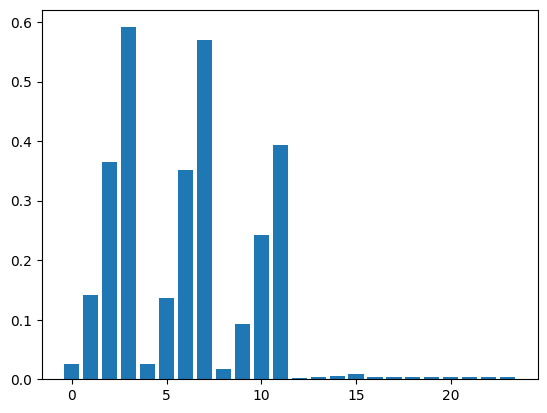

In [45]:
# print(np.array(all_errors))

data = np.array(all_errors)
df = pd.DataFrame(data, columns=lam)
print(df)
data = data.T.flatten()

plt.bar(range(len(data)),data)
# Print the DataFrame
print()

## FINAL RESULTS

In [429]:

y_results = H(X_T,W)
results_array = np.array(y_results)
# Crear un array para los IDs
ids = np.arange(len(results_array))+1
# Concatenar los IDs y los resultados en un array bidimensional
data = np.column_stack((ids, results_array))

# Guardar el array como un archivo CSV
np.savetxt('resultados_nl.csv', data, delimiter=',', fmt='%d,%.2f', header='ID,MTO_PIA', comments='')

print("Archivo CSV guardado exitosamente.")

(9615, 1)
(9615, 1)
Archivo CSV guardado exitosamente.
